<a href="https://colab.research.google.com/github/samuelsushanth/machinelearninganddataanalysisprojects/blob/main/literarcyrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the dataset

df=pd.read_excel('EDA_census.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,C-8 EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
count,3134,3134,3134,3133,3135,3134,3135,3134,3134,3135,...,3134,3136,3134,3134,3135,3134,3134,3135,3134,3134
unique,3,38,3,37,6,31,3112,3088,3092,2945,...,686,1374,1333,993,1512,1492,1376,1668,1437,1373
top,C2308,17,000,State - MEGHALAYA,Total,18,1176,6846,467,589,...,0,0,0,0,0,0,0,0,0,0
freq,3132,87,3132,87,1044,108,3,3,3,5,...,1538,1321,1330,1362,1519,1519,1539,162,200,219


In [ ]:
df.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [ ]:
mode = df[' num_keywords'].mode()
print(mode)

0    7.0
Name:  num_keywords, dtype: float64


In [ ]:
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

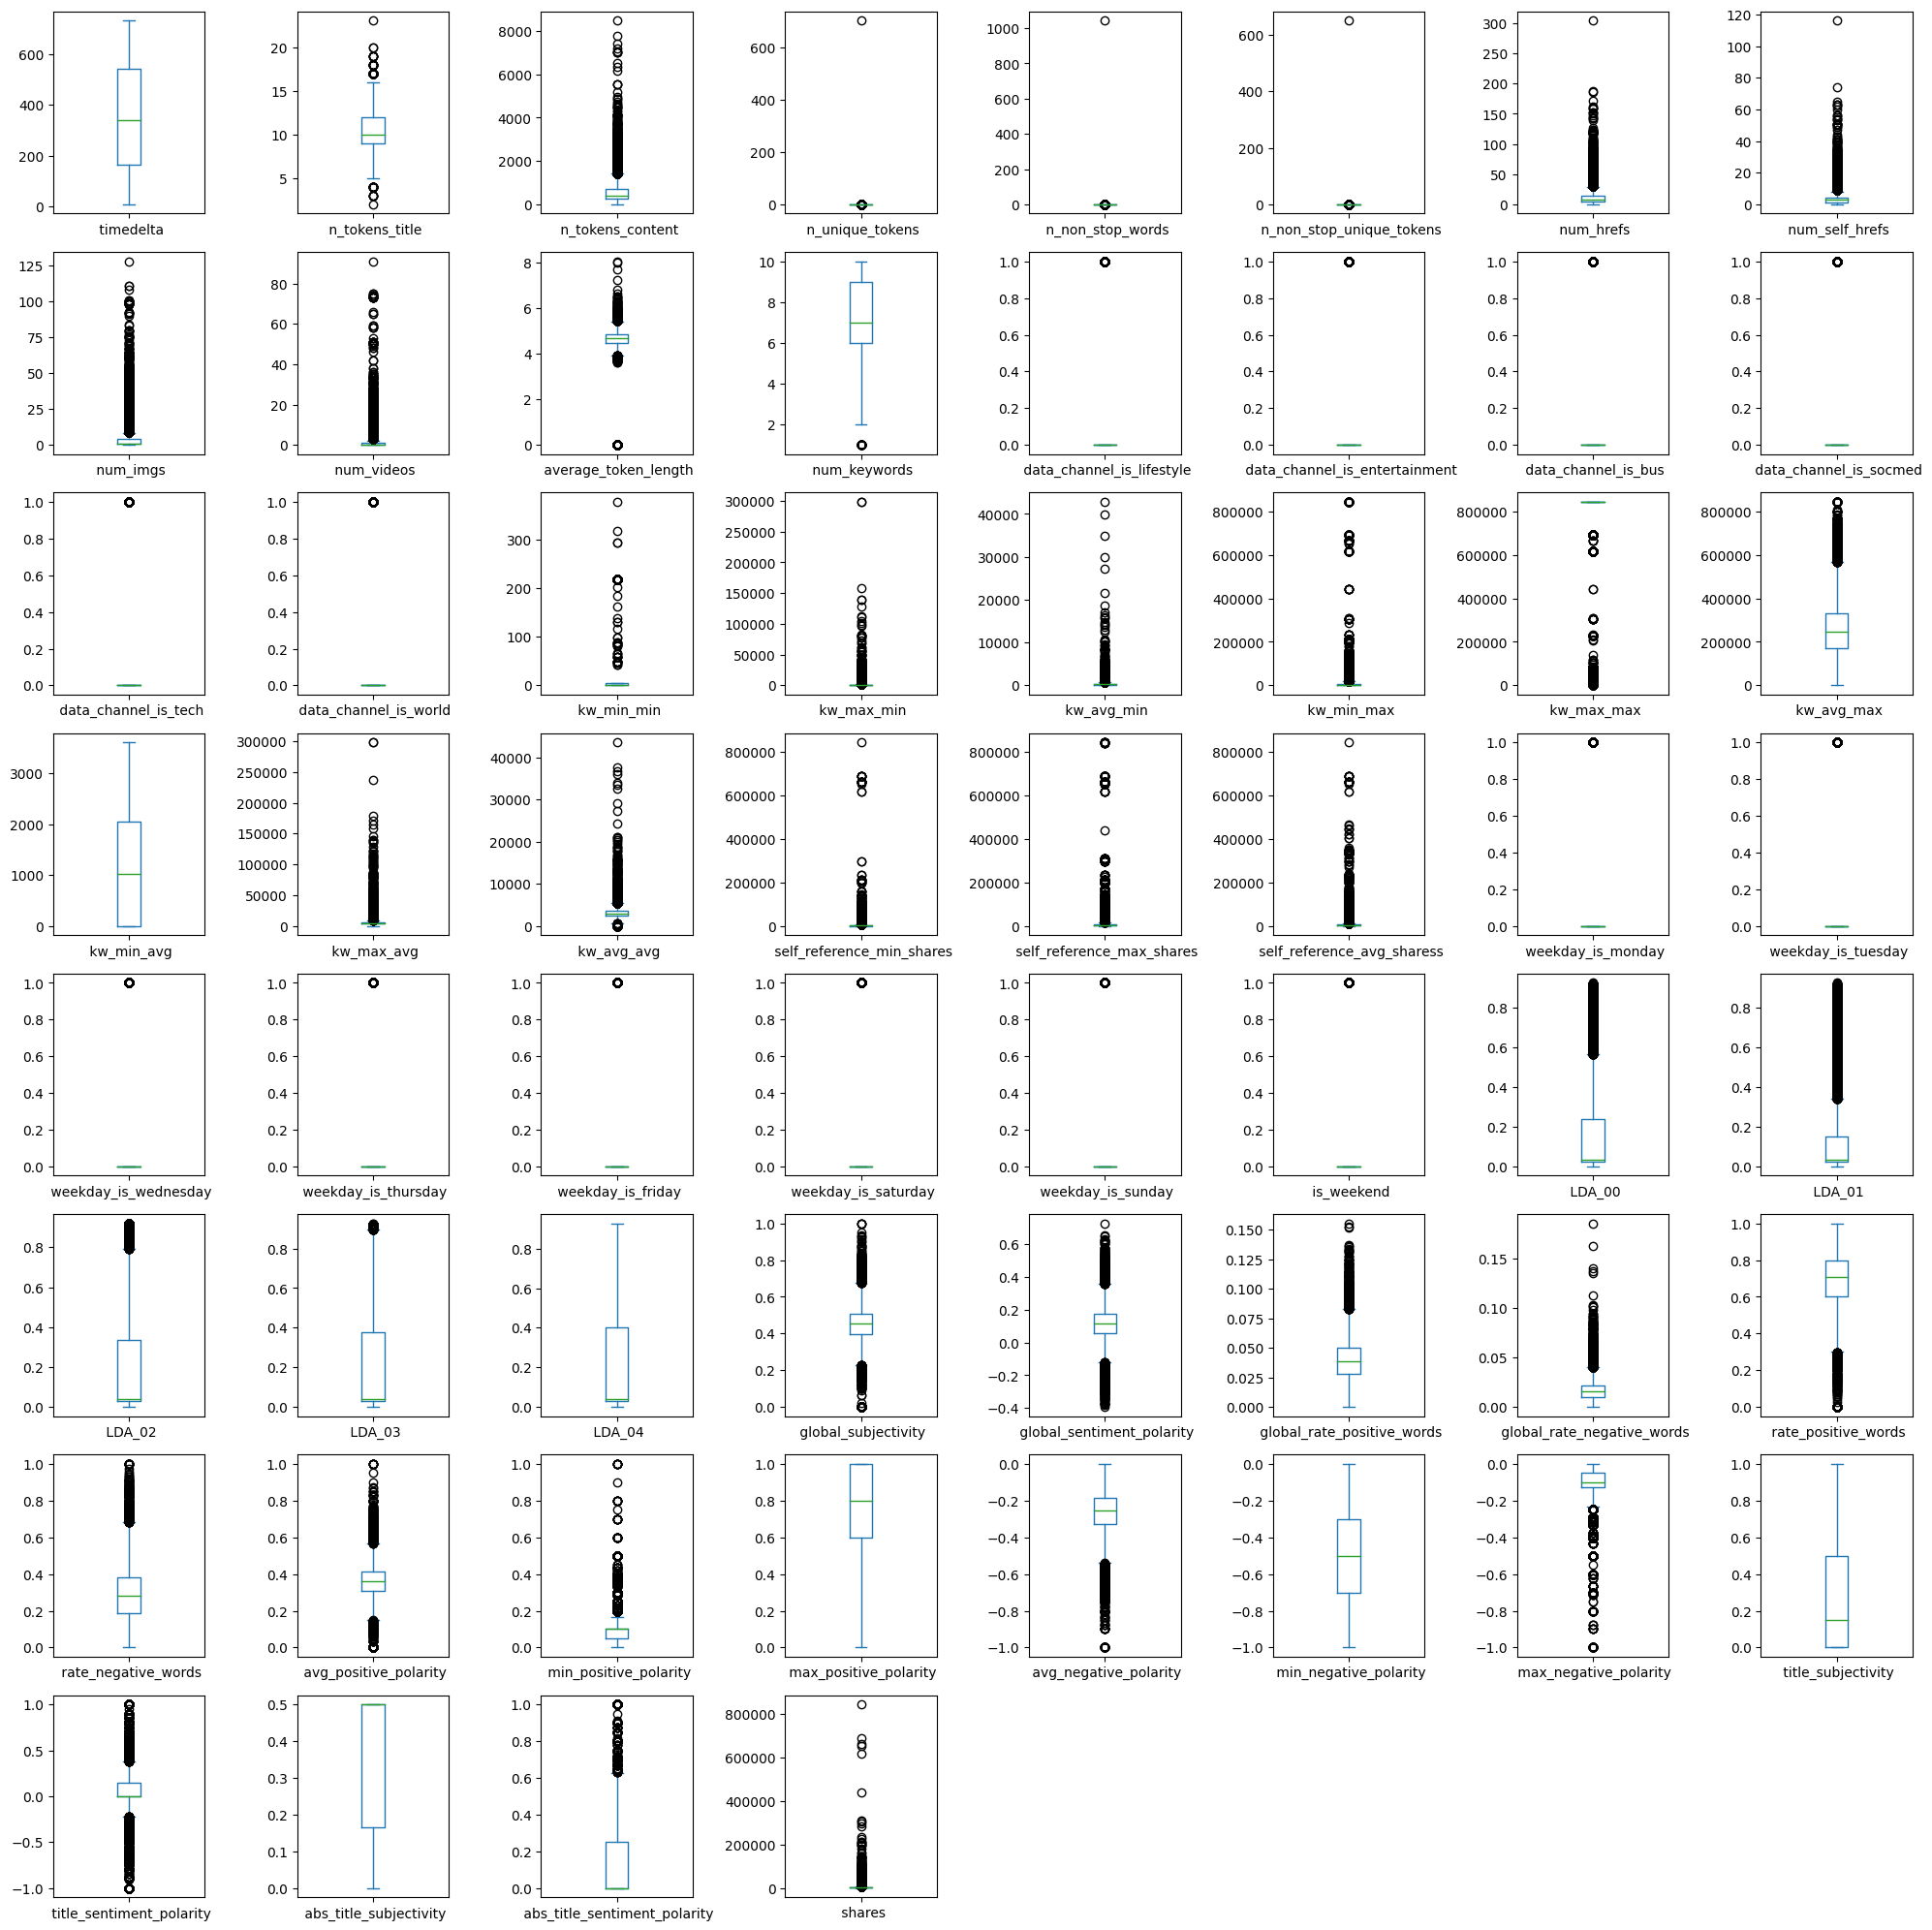

In [ ]:
import math
df.plot(kind='box', figsize=(20, 20), subplots=True, layout=(math.ceil(math.sqrt(len(df.columns))), math.ceil(math.sqrt(len(df.columns)))), sharex=False, sharey=False); plt.tight_layout(); plt.show()

In [ ]:
mean = df[' shares'].mean()
print(mean)
df[' shares'].median()



3395.3801836343455


1400.0

In [ ]:
pp=pd.read_csv('popularity.csv')


In [ ]:
import pandas as pd
# Assuming 'pp' is your DataFrame
summary = pp[' shares'].describe()
print(summary)

# Calculate the median separately as it's not included in describe() by default
median = pp[' shares'].median()
print(f"Median: {median}")

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64
Median: 1400.0


In [ ]:
np.percentile(pp[' shares'], 25)


946.0

In [ ]:
np.percentile(pp[' shares'], 75)


2800.0

In [ ]:
shares = df[' shares']
print(shares)

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with the 'shares' column

# Calculate Q1, Q3, and IQR
Q1 = df[' shares'].quantile(0.25)
Q3 = df[' shares'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df[' shares'] >= lower_bound) & (df[' shares'] <= upper_bound)]

# Calculate mean after removing outliers
mean_shares = df_filtered[' shares'].mean()

print(f"Mean number of shares after removing outliers: {mean_shares:.2f}")

Mean number of shares after removing outliers: 1671.97


In [ ]:
# Assuming 'df' is your DataFrame with the 'shares' column

# Filter out articles with more than 10800 shares
df_filtered = df[df[' shares'] <= 10800]

# Calculate the mean of the remaining articles
mean_shares = df_filtered[' shares'].mean()

print(f"Mean number of shares after removing articles with more than 10800 shares: {mean_shares:.2f}")

Mean number of shares after removing articles with more than 10800 shares: 2074.33


In [ ]:
sd = df_filtered[' shares'].std()
print(sd)

1871.8141388442016


In [ ]:
df_filtered.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,...,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000,37663.000000
mean,354.205427,10.394658,547.993601,0.549110,0.998858,0.690760,10.747259,3.301967,4.437405,1.214216,...,0.095078,0.755888,-0.258338,-0.520399,-0.107103,0.279444,0.070141,0.341902,0.153909,2074.334387
std,214.867086,2.112319,467.255173,3.611926,5.366809,3.349307,11.127499,3.855264,8.203935,4.011003,...,0.070550,0.246801,0.126841,0.289643,0.094539,0.322447,0.262575,0.188975,0.224003,1871.814139
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,163.000000,9.000000,248.000000,0.470776,1.000000,0.626263,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.326389,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,927.000000
50%,338.000000,10.000000,413.000000,0.538690,1.000000,0.690583,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.251852,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,545.000000,12.000000,718.000000,0.607477,1.000000,0.754386,13.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2400.000000
max,731.000000,23.000000,7764.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,10800.000000


In [ ]:
# Assuming 'df' is your original DataFrame with the 'shares' column

# Total number of data points before removing outliers
total_points = len(df)

# Number of data points after removing outliers
df_filtered = df[df[' shares'] <= 10800]
points_after_removal = len(df_filtered)

# Calculate the number and percentage of removed points
removed_points = total_points - points_after_removal
percentage_removed = (removed_points / total_points) * 100

print(f"Total data points: {total_points}")
print(f"Data points after removal: {points_after_removal}")
print(f"Number of outliers removed: {removed_points}")
print(f"Percentage of data points removed: {percentage_removed:.2f}%")

Total data points: 39644
Data points after removal: 37663
Number of outliers removed: 1981
Percentage of data points removed: 5.00%
